In [2]:
#Logistics Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm

In [3]:
bc_df=pd.read_excel('breast_cancer.xlsx',header=None) #30th col is binary
bc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
Plotting a Best Fit Line for a Numerical Predictor(X) & Binary Categorical Target(y)

In [6]:
X=bc_df.loc[:,29]
X

0      0.11890
1      0.08902
2      0.08758
3      0.17300
4      0.07678
        ...   
564    0.07115
565    0.06637
566    0.07820
567    0.12400
568    0.07039
Name: 29, Length: 569, dtype: float64

In [8]:
y=bc_df.loc[:,30]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: 30, Length: 569, dtype: int64

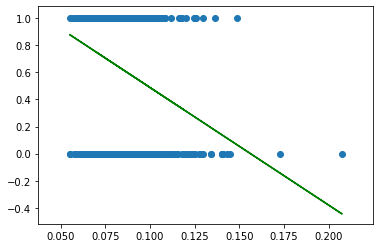

In [9]:
#USE numpy.polyfit() TO PLOT A LINEAR REGRESSION LINE ON A SCATTER PLOT
import numpy as np
plt.scatter(X,y)
m,b = np.polyfit(X, y, 1) #m = slope, b=intercept
plt.plot(X, m*X + b,'g')

#Here the probability for X value > 0.15 gives negative y value so Linear Fit not a solution

In [10]:
m

-8.677550953322216

In [11]:
b

1.3558606264834756

print(m*X+b)# y output  --> Eq--> y=-8.67*(Col 29)+1.35 --> negative coeff means as the 
y increases X decreases so negative correlation

In [12]:
bc=bc_df.iloc[:,0:30]
bc

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
target=bc_df.iloc[:,30]
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: 30, Length: 569, dtype: int64

In [15]:
bc.corr()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


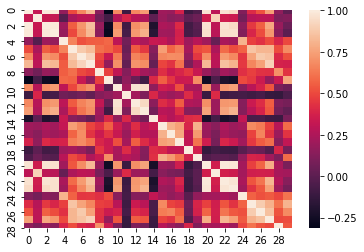

In [14]:
sns.heatmap(bc.corr())

In [16]:
bc_s=scale(bc)#Standard Normalization --> Mean to 0 & SD TO 1
bc_s

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
bc_train,bc_test,tar_train,tar_test=train_test_split(bc_s,target,test_size=0.2,random_state=15)
bc_train.shape,bc_test.shape,tar_train.shape,tar_test.shape

((455, 30), (114, 30), (455,), (114,))

In [19]:
logR=LogisticRegression().fit(bc_train,tar_train)
logR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logR.predict_proba(bc_test) #shows probability values

array([[1.85823942e-04, 9.99814176e-01],
       [9.33023254e-05, 9.99906698e-01],
       [9.96418376e-01, 3.58162386e-03],
       [4.08451393e-02, 9.59154861e-01],
       [9.10941157e-04, 9.99089059e-01],
       [9.99805243e-01, 1.94757239e-04],
       [6.04090119e-03, 9.93959099e-01],
       [1.19698429e-03, 9.98803016e-01],
       [5.94858393e-02, 9.40514161e-01],
       [6.80975619e-05, 9.99931902e-01],
       [9.99999999e-01, 1.25304332e-09],
       [9.97777986e-01, 2.22201444e-03],
       [1.04280753e-04, 9.99895719e-01],
       [6.17888393e-06, 9.99993821e-01],
       [1.10810164e-05, 9.99988919e-01],
       [3.21460627e-03, 9.96785394e-01],
       [3.80295376e-02, 9.61970462e-01],
       [3.48571215e-01, 6.51428785e-01],
       [4.73021110e-04, 9.99526979e-01],
       [2.29278457e-03, 9.97707215e-01],
       [4.24571885e-03, 9.95754281e-01],
       [1.17869121e-01, 8.82130879e-01],
       [3.43328431e-04, 9.99656672e-01],
       [2.13902403e-03, 9.97860976e-01],
       [1.266702

In [20]:
print(logR.intercept_)

[0.22949516]


In [21]:
print(logR.coef_)

[[-0.48767701 -0.3965642  -0.46046823 -0.53370808 -0.15300455  0.45447366
  -0.78640477 -1.03739107 -0.00206813  0.18785805 -1.26093904 -0.02619774
  -0.77361508 -0.97075353 -0.27011951  1.07619526  0.12788283 -0.38199358
   0.39084138  0.4260699  -0.96800378 -1.06191936 -0.79997119 -0.98880693
  -0.35613156  0.12369635 -1.02659149 -0.9090843  -0.88932896 -0.4444785 ]]


In [22]:
pred=logR.predict(bc_test)
pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [23]:
#For Contingency table first create a dataframe with respective Columns
df1 = pd.DataFrame({'actual': tar_test, 'predictions': pred}) 
df1

,actual,predictions
350,1,1
222,1,1
141,0,0
447,1,1
103,1,1
...,...,...
250,0,0
465,1,1
11,0,0
261,0,0


In [24]:
#Count of each combination --> Contingency Table
ct = pd.crosstab(df1['actual'], df1['predictions'])
ct

predictions,0,1
actual,,
0,34,5
1,1,74


In [25]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [36]:
accuracy=sm.accuracy_score(tar_test,pred) 

In [34]:
f1 = f1_score(tar_test, pred)
f1

0.961038961038961

In [35]:
precision = precision_score(tar_test, pred)
precision

0.9367088607594937

In [29]:
recall = recall_score(tar_test, pred)
recall

0.9866666666666667

In [31]:
roc_auc = roc_auc_score(tar_test, pred)
roc_auc

0.9292307692307693

In [37]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)

Accuracy is  : 0.9473684210526315
F1 score is : 0.961038961038961
Precision is  : 0.9367088607594937
Recall is  : 0.9866666666666667
Roc Auc is  : 0.9292307692307693
